***
# 2.1 Categorical rhythm for Bird 5
### JX, 03/08/2022
***
    Bird5:
    LS110131.10.9.2015GeoPool.aiff
    LS110136.10.10.2015GeoGreens.aiff
    LS110143.10.12.2015GeoGreens.aiff
    LS110146A.10.13.2015GeoGreens.aiff
    
***

## Specify Locations

In [1]:
from butcherbird.utils.paths import DATA_DIR

In [2]:
indv = "Bird5"

In [3]:
SAVE_LOC = DATA_DIR/'interim/raw_spectrogram/butcherbird_note_df.pickle'

## Load in Data

In [4]:
import pandas as pd

In [5]:
note_df = pd.read_pickle(SAVE_LOC)

In [6]:
indv_df = note_df[note_df['indv'] == indv].reset_index()

In [7]:
indv_df.head()

,index,phrase_nb,phrase_strt,phrase_end,phrase_len,note_cnt,note_nb,note_strt,note_end,note_len,indv,indvi,key,audio,rate,spectrogram
0,0,0,513.78,517.061923,3.281923,15,0,513.780000,513.905214,0.125214,Bird5,0,LS110143.10.12.2015GeoGreens_dn,"[-0.0, -7.356902671940375e-05, -0.000162745769...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,1,0,513.78,517.061923,3.281923,15,1,513.917747,513.980936,0.063188,Bird5,0,LS110143.10.12.2015GeoGreens_dn,"[0.0, 0.0014728324725323874, 0.002769917049663...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,2,0,513.78,517.061923,3.281923,15,2,514.170000,514.480698,0.310698,Bird5,0,LS110143.10.12.2015GeoGreens_dn,"[0.0, 4.4531726447127805e-05, 4.62385657049665...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,3,0,513.78,517.061923,3.281923,15,3,514.620783,515.310000,0.689217,Bird5,0,LS110143.10.12.2015GeoGreens_dn,"[-0.0, -3.2631556531601904e-06, -7.44037823939...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,4,0,513.78,517.061923,3.281923,15,4,515.355217,515.660180,0.304964,Bird5,0,LS110143.10.12.2015GeoGreens_dn,"[-0.0, -2.958346783314775e-05, -7.119856074752...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


## Calculate Empirical Rhythm

In [8]:
import butcherbird.rhythm as rhythm
import seaborn as sns

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/rhythm.py:163: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [9]:
dyadic = rhythm.construct_rhythm_df(indv_df,'indv')

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/489 [00:00<?, ?it/s]

  0%|          | 0/489 [00:00<?, ?it/s]

  0%|          | 0/489 [00:00<?, ?it/s]

  0%|          | 0/489 [00:00<?, ?it/s]

In [10]:
dyadic.head()

,intervals1,intervals2,label1,label2,label3,s_interval,l_interval,cycle_dur,ratio_roeske,ratio_custom,cycle_rank
0,0.047763,0.124941,Bird5,Bird5,Bird5,0.047763,0.124941,0.172703,0.276559,0.382283,1
1,0.124941,0.053709,Bird5,Bird5,Bird5,0.053709,0.124941,0.178649,0.699363,0.429873,2
2,0.053709,0.192387,Bird5,Bird5,Bird5,0.053709,0.192387,0.246095,0.218243,0.279171,3
3,0.142577,0.114876,Bird5,Bird5,Bird5,0.114876,0.142577,0.257453,0.553798,0.805713,4
4,0.255124,0.047763,Bird5,Bird5,Bird5,0.047763,0.255124,0.302886,0.842308,0.187214,5


<AxesSubplot:xlabel='ratio_roeske', ylabel='Count'>

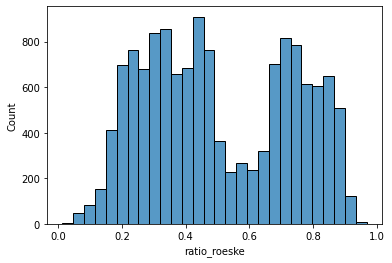

In [11]:
sns.histplot(dyadic['ratio_roeske'])

## Calculate Uniform Rhythm
> Uniform rhythm is calculated under the assumption that interval lengths are uniformly distributed between a minimum and maximum interval length.  

In [12]:
n = 1000

In [13]:
import numpy as np
import numpy.random as random

In [14]:
interval_min = np.min([dyadic['intervals1'].values, dyadic['intervals2']])
interval_max = np.max([dyadic['intervals1'].values, dyadic['intervals2']])

In [15]:
df_uni = []
for i in np.arange(0, n):
    interval1_uni = random.uniform(low = interval_min, high = interval_max, size = len(dyadic))
    interval2_uni = random.uniform(low = interval_min, high = interval_max, size = len(dyadic))
    df_uni.append(interval1_uni / (interval1_uni + interval2_uni))

In [16]:
uni_ratio = np.array(df_uni).flatten()

<AxesSubplot:ylabel='Count'>

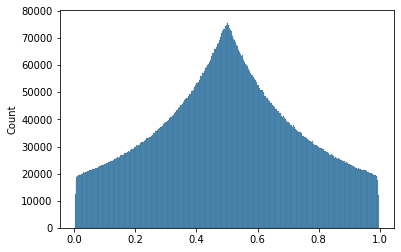

In [17]:
sns.histplot(uni_ratio)

## Calculate Shuffled IOI Rhythm
> Shuffled rhythm is calculated under the assumption that interval lengths are bootstrapped from the empirical distribution, but the consecutive order of intervals are shuffled. 

In [18]:
df_sf = []
for i in np.arange(0, n):
    interval1_sf = dyadic['intervals1'].sample(frac = 1, replace = True).values
    interval2_sf = dyadic['intervals2'].sample(frac = 1, replace = True).values
    df_sf.append(interval1_sf / (interval1_sf + interval2_sf))

In [19]:
sf_ratio = np.array(df_sf).flatten()

<AxesSubplot:ylabel='Count'>

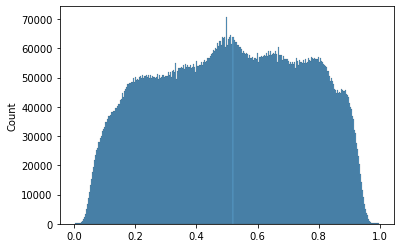

In [20]:
sns.histplot(sf_ratio)

## Calculate Shuffled Note + Gap
> Shuffled Note + Gap rhythm is calculated under the assumption that note length and inter-note gaps are independently shuffled.

In [21]:
import numpy.random as random

In [22]:
# find all gaps and their positions
grand_gaps = []

for phrase_nb in np.unique(indv_df['phrase_nb']):
    ## pull out each phrase
    phrase = indv_df[indv_df['phrase_nb'] == phrase_nb]

        ## find all internote gaps
    gaps = phrase['note_strt'][1:].values - phrase['note_end'][:-1].values
    grand_gaps.append(gaps) 

grand_gaps = np.hstack(grand_gaps)
grand_gaps = grand_gaps[grand_gaps < 10]## gaps that are more than 10 seconds long are noise
grand_gaps = grand_gaps[grand_gaps >= 0] ## gaps must be larger than or equal to 0

In [23]:
grand_gaps = np.hstack(grand_gaps)

In [24]:
df_lg = []

for i in np.arange(0, n):
    ## randomly shuffle gaps
    random.shuffle(grand_gaps)
    ## add to randomly shuffled lengths
    shuffled_lg = grand_gaps + indv_df['note_len'].sample(n = len(grand_gaps), replace = True).values
    
    shuffled_lg_i1 = shuffled_lg[:-1]
    shuffled_lg_i2 = shuffled_lg[1:]
    
    df_lg.append(shuffled_lg_i1 / (shuffled_lg_i1 + shuffled_lg_i2))
    

In [25]:
lg_ratio = np.hstack(df_lg)

<AxesSubplot:ylabel='Count'>

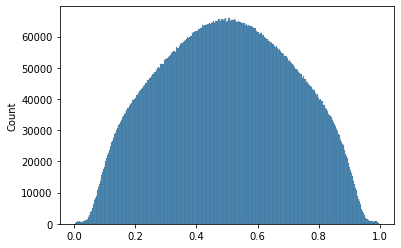

In [26]:
sns.histplot(lg_ratio)

## Draw Figure

In [27]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from butcherbird.utils.paths import FIGURE_DIR

In [ ]:
figure(figsize = (8, 6), dpi = 300)

plt.rcParams['patch.edgecolor'] = 'none'

fig = sns.histplot(
    x = dyadic['ratio_roeske'],
    binwidth = 0.01,
    stat = 'density',
    color = '#A3E301',
    fill = '#A3E301',
    kde = True,
)

uni = sns.histplot(
    x = uni_ratio,
    stat = 'density',
    alpha = 0,
    color = '#FC6983',
    kde = True,
    line_kws = dict(linestyle = 'dashed')
)

sf = sns.histplot(
    x = sf_ratio,
    stat = 'density',
    alpha = 0,
    color = '#1DB6AB',
    kde = True,
    line_kws = dict(linestyle = 'dashed')
)

lg = sns.histplot(
    x = lg_ratio,
    stat = 'density',
    alpha = 0,
    color = '#15215B',
    kde = True,
    line_kws = dict(linestyle = 'dashed')
)

ax = plt.gca()
ax.set_xlim([0, 1])
plt.xticks(np.arange(0, 1.25, 0.25))

# save
figname = 'fig1_' + 'categorical_rhythm_' + indv + '.svg'
plt.savefig(FIGURE_DIR/'categorical_rhythm'/figname)

## Do some statistics

In [ ]:
import scipy

In [ ]:
ks = scipy.stats.ks_2samp(dyadic['ratio_roeske'], sf_ratio)

In [ ]:
len(dyadic['ratio_roeske'])

In [ ]:
len(sf_ratio)

In [ ]:
ks

In [ ]:
kslg = scipy.stats.ks_2samp(dyadic['ratio_roeske'], lg_ratio)

In [ ]:
len(lg_ratio)

In [ ]:
kslg

## Calculate Hopkins Statistics and confidence intervals

In [ ]:
from butcherbird.rhythm import hopkins
from tqdm.autonotebook import tqdm
from joblib import Parallel, delayed

In [ ]:
h_iterations = 100
shuffle_iterations = 100
n_jobs = 36

In [ ]:
import numpy as np
import scipy.stats

## a standard calculation for confidence interval
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [ ]:
## empirical
SDoH = []

for i in tqdm(range(0, h_iterations)):
    SDoH.append(hopkins(dyadic[['ratio_roeske']]))
    
## take mean of sampling distribution of Hopkins as best estimate
mean_confidence_interval(SDoH)

In [ ]:
## uni
SDoH_uni = []

with Parallel(n_jobs= n_jobs) as parallel:
    SDoH_uni = parallel(
        delayed(hopkins)(
            pd.DataFrame(sample)
        )
        for sample in tqdm(df_uni)
    )

## take mean of sampling distribution of Hopkins as best estimate
mean_confidence_interval(SDoH_uni)

In [ ]:
## shuffle
SDoH_shuffle = []

with Parallel(n_jobs= n_jobs) as parallel:
    SDoH_shuffle = parallel(
        delayed(hopkins)(
            pd.DataFrame(sample)
        )
        for sample in tqdm(df_sf)
    )

## take mean of sampling distribution of Hopkins as best estimate
mean_confidence_interval(SDoH_shuffle)

In [ ]:
## lg shuffle
SDoH_lg = []

with Parallel(n_jobs= n_jobs) as parallel:
    SDoH_lg = parallel(
        delayed(hopkins)(
            pd.DataFrame(sample)
        )
        for sample in tqdm(df_lg)
    )

## take mean of sampling distribution of Hopkins as best estimate
mean_confidence_interval(SDoH_lg)

## Timescale Estimation

Timescale is estimated as mean inter-onset interval

In [ ]:
import numpy as np
import scipy.stats

## a standard calculation for confidence interval
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [ ]:
sequential_note = dyadic.sort_index()
sequential_note

In [ ]:
n_IOI = list(sequential_note['intervals1'].values)
n_IOI.append(sequential_note['intervals2'].values[-1])

In [ ]:
mean_confidence_interval(n_IOI, confidence=0.95)